LIBRARIES IMPORT


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

IMPORT DATASET

In [2]:
spam_df = pd.read_csv("emails.csv")

In [3]:
spam_df.head(10)

,text,spam
0,Subject: naturally irresistible your corporate...,1
1,Subject: the stock trading gunslinger fanny i...,1
2,Subject: unbelievable new homes made easy im ...,1
3,Subject: 4 color printing special request add...,1
4,"Subject: do not have money , get software cds ...",1
5,"Subject: great nnews hello , welcome to medzo...",1
6,Subject: here ' s a hot play in motion homela...,1
7,Subject: save your money buy getting this thin...,1
8,Subject: undeliverable : home based business f...,1
9,Subject: save your money buy getting this thin...,1


In [4]:
spam_df.tail()

,text,spam
5723,Subject: re : research and development charges...,0
5724,"Subject: re : receipts from visit jim , than...",0
5725,Subject: re : enron case study update wow ! a...,0
5726,"Subject: re : interest david , please , call...",0
5727,Subject: news : aurora 5 . 2 update aurora ve...,0


In [5]:
spam_df.describe()

,spam
count,5728.000000
mean,0.238827
std,0.426404
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,1.000000


In [6]:
spam_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5728 entries, 0 to 5727
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    5728 non-null   object
 1   spam    5728 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 89.6+ KB


VISUALIZE DATASET

In [7]:
# Let's see which message is the most popular ham/spam message
spam_df.groupby('spam').describe()

text                                                               
     count unique                                                top freq
spam                                                                     
0     4360   4327  Subject: * special notification * aurora versi...    2
1     1368   1368  Subject: naturally irresistible your corporate...    1

In [8]:
# Let's get the length of the messages
spam_df['length'] = spam_df['text'].apply(len)
spam_df.head()


,text,spam,length
0,Subject: naturally irresistible your corporate...,1,1484
1,Subject: the stock trading gunslinger fanny i...,1,598
2,Subject: unbelievable new homes made easy im ...,1,448
3,Subject: 4 color printing special request add...,1,500
4,"Subject: do not have money , get software cds ...",1,235


In [9]:
spam_df

,text,spam,length
0,Subject: naturally irresistible your corporate...,1,1484
1,Subject: the stock trading gunslinger fanny i...,1,598
2,Subject: unbelievable new homes made easy im ...,1,448
3,Subject: 4 color printing special request add...,1,500
4,"Subject: do not have money , get software cds ...",1,235
...,...,...,...
5723,Subject: re : research and development charges...,0,1189
5724,"Subject: re : receipts from visit jim , than...",0,1167
5725,Subject: re : enron case study update wow ! a...,0,2131
5726,"Subject: re : interest david , please , call...",0,1060


<Axes: ylabel='Frequency'>

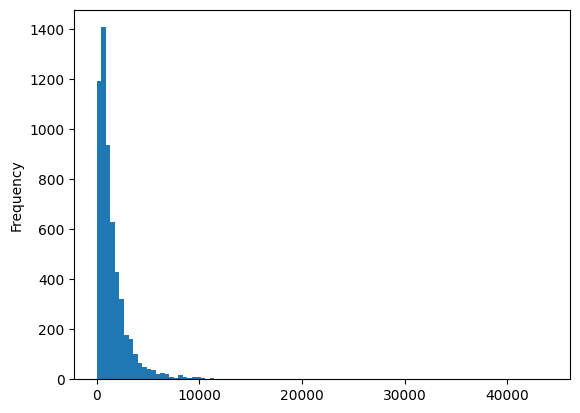

In [10]:
spam_df['length'].plot(bins=100, kind='hist') 

In [11]:
spam_df.length.describe()

count     5728.000000
mean      1556.768680
std       2042.649812
min         13.000000
25%        508.750000
50%        979.000000
75%       1894.250000
max      43952.000000
Name: length, dtype: float64

In [12]:
# Let's see the longest message 43952
spam_df[spam_df['length'] == 43952]['text'].iloc[0]

'Subject: from the enron india newsdesk - april 27 th newsclips  fyi news articles from indian press .  - - - - - - - - - - - - - - - - - - - - - - forwarded by sandeep kohli / enron _ development on 04 / 27 / 2001 08 : 24 am - - - - - - - - - - - - - - - - - - - - - - - - - - -  nikita varma  04 / 27 / 2001 07 : 51 am  to : nikita varma / enron _ development @ enron _ development  cc : ( bcc : sandeep kohli / enron _ development )  subject : from the enron india newsdesk - april 27 th newsclips  friday apr 27 2001 , http : / / www . economictimes . com / today / cmo 3 . htm  dpc board empowers md to cancel mseb contract  friday apr 27 2001 , http : / / www . economictimes . com / today / 27 compl 1 . htm  mseb pays rs 134 cr under \' protest \' to dpc  friday , april 27 , 001 , http : / / www . businessstandard . com / today / economy 4 . asp ? menu = 3  enron india md authorised to terminate ppa  friday , april 27 , 2001 , http : / / www . financialexpress . com / fe 20010427 / topl 

In [13]:
# Let's divide the messages into spam and ham

In [14]:
ham = spam_df[spam_df['spam']==0]

In [15]:
spam = spam_df[spam_df['spam']==1]

In [16]:
ham

,text,spam,length
1368,"Subject: hello guys , i ' m "" bugging you "" f...",0,1188
1369,Subject: sacramento weather station fyi - - ...,0,1997
1370,Subject: from the enron india newsdesk - jan 1...,0,7902
1371,Subject: re : powerisk 2001 - your invitation ...,0,3644
1372,Subject: re : resco database and customer capt...,0,5535
...,...,...,...
5723,Subject: re : research and development charges...,0,1189
5724,"Subject: re : receipts from visit jim , than...",0,1167
5725,Subject: re : enron case study update wow ! a...,0,2131
5726,"Subject: re : interest david , please , call...",0,1060


In [17]:
spam

,text,spam,length
0,Subject: naturally irresistible your corporate...,1,1484
1,Subject: the stock trading gunslinger fanny i...,1,598
2,Subject: unbelievable new homes made easy im ...,1,448
3,Subject: 4 color printing special request add...,1,500
4,"Subject: do not have money , get software cds ...",1,235
...,...,...,...
1363,Subject: are you ready to get it ? hello ! v...,1,347
1364,Subject: would you like a $ 250 gas card ? do...,1,188
1365,"Subject: immediate reply needed dear sir , i...",1,3164
1366,Subject: wanna see me get fisted ? fist bang...,1,734


<Axes: ylabel='Frequency'>

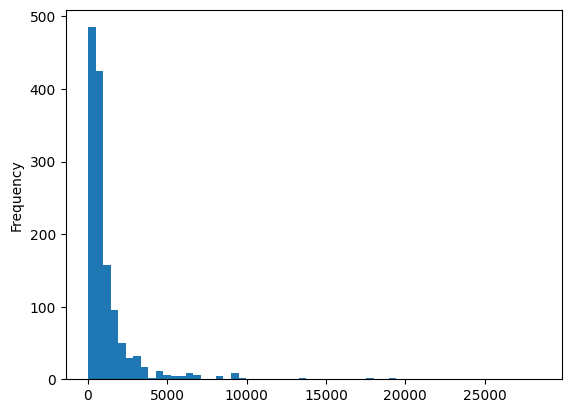

In [18]:
spam['length'].plot(bins=60, kind='hist') 

<Axes: ylabel='Frequency'>

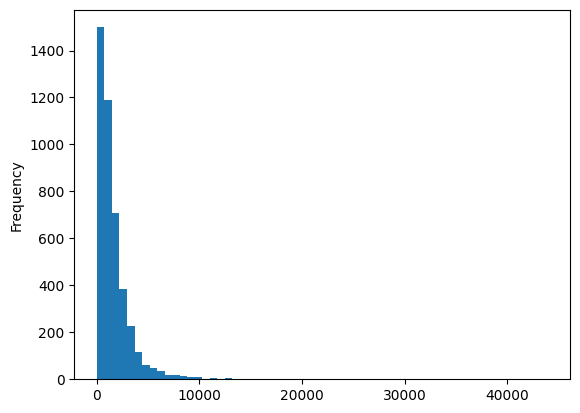

In [19]:
ham['length'].plot(bins=60, kind='hist') 

In [20]:
print( 'Spam percentage =', (len(spam) / len(spam_df) )*100,"%")

Spam percentage = 23.88268156424581 %


In [21]:
print( 'Ham percentage =', (len(ham) / len(spam_df) )*100,"%")

Ham percentage = 76.11731843575419 %


<Axes: ylabel='count'>

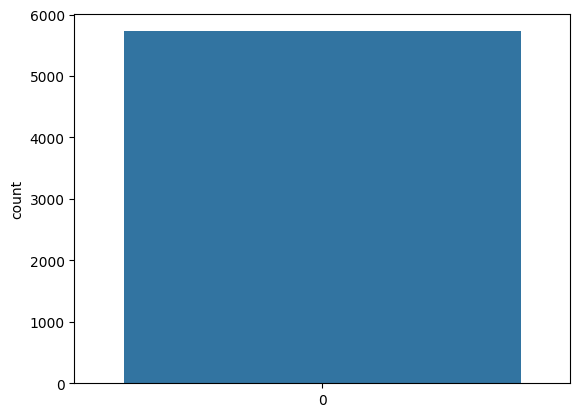

In [22]:
sns.countplot(spam_df['spam'], label = "Count") 

CREATE TESTING AND TRAINING DATASET/DATA CLEANING

data cleaning


In [23]:
import string
string.punctuation
from nltk.corpus import stopwords
stopwords.words('english')
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()


Data cleaning 

In [24]:
import nltk
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
nltk.download('punkt')
nltk.download('wordnet')

# Function for message cleaning with tokenization and lemmatization
def message_cleaning(message):
    # Tokenization: Splitting the text into words
    tokens = word_tokenize(message)
    
    # Lemmatization: Converting words to their base form
    lemmatizer = WordNetLemmatizer()
    clean_tokens = [lemmatizer.lemmatize(word.lower()) for word in tokens if word.lower() not in stopwords.words('english') and word.lower() not in string.punctuation]
    
    return clean_tokens

# Test the newly added function with tokenization and lemmatization
spam_df_clean = spam_df['text'].apply(lambda x: message_cleaning(x))


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\suhas\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\suhas\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [25]:
print(spam_df_clean[0])


['subject', 'naturally', 'irresistible', 'corporate', 'identity', 'lt', 'really', 'hard', 'recollect', 'company', 'market', 'full', 'suqgestions', 'information', 'isoverwhelminq', 'good', 'catchy', 'logo', 'stylish', 'statlonery', 'outstanding', 'website', 'make', 'task', 'much', 'easier', 'promise', 'havinq', 'ordered', 'iogo', 'company', 'automaticaily', 'become', 'world', 'ieader', 'isguite', 'ciear', 'without', 'good', 'product', 'effective', 'business', 'organization', 'practicable', 'aim', 'hotat', 'nowadays', 'market', 'promise', 'marketing', 'effort', 'become', 'much', 'effective', 'list', 'clear', 'benefit', 'creativeness', 'hand', 'made', 'original', 'logo', 'specially', 'done', 'reflect', 'distinctive', 'company', 'image', 'convenience', 'logo', 'stationery', 'provided', 'format', 'easy', 'use', 'content', 'management', 'system', 'letsyou', 'change', 'website', 'content', 'even', 'structure', 'promptness', 'see', 'logo', 'draft', 'within', 'three', 'business', 'day', 'afford

In [26]:
print(spam_df['text'][0])


Subject: naturally irresistible your corporate identity  lt is really hard to recollect a company : the  market is full of suqgestions and the information isoverwhelminq ; but a good  catchy logo , stylish statlonery and outstanding website  will make the task much easier .  we do not promise that havinq ordered a iogo your  company will automaticaily become a world ieader : it isguite ciear that  without good products , effective business organization and practicable aim it  will be hotat nowadays market ; but we do promise that your marketing efforts  will become much more effective . here is the list of clear  benefits : creativeness : hand - made , original logos , specially done  to reflect your distinctive company image . convenience : logo and stationery  are provided in all formats ; easy - to - use content management system letsyou  change your website content and even its structure . promptness : you  will see logo drafts within three business days . affordability : your  mar

 APPLY COUNT VECTORIZER TO OUR MESSAGES LIST

In [27]:
from sklearn.feature_extraction.text import CountVectorizer
# Define the cleaning pipeline we defined earlier
vectorizer = CountVectorizer(analyzer = message_cleaning)
spamham_countvectorizer = vectorizer.fit_transform(spam_df['text'])


In [28]:
print(vectorizer.get_feature_names_out())


['\x01' '\x02' '\x03' ... 'zzn' 'zzncacst' 'zzzz']


In [29]:
print(spamham_countvectorizer.toarray())  

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [30]:
spamham_countvectorizer.shape

(5728, 34597)

TRAINING THE MODEL WITH ALL DATASET

In [31]:
from sklearn.naive_bayes import MultinomialNB
NB_classifier = MultinomialNB()
label = spam_df['spam'].values
NB_classifier.fit(spamham_countvectorizer, label)

MultinomialNB()

In [32]:
testing_sample = ['Free money!!!', "Hi Kim, Please let me know if you need any further information. Thanks"]
testing_sample_countvectorizer = vectorizer.transform(testing_sample)
test_predict = NB_classifier.predict(testing_sample_countvectorizer)
test_predict

array([1, 0], dtype=int64)

In [59]:
def predict_spam(subject_line):
    # Vectorizing the input subject line
    subject_count = vectorizer.transform([subject_line])
    
    # Predicting whether the subject line is spam or not
    prediction = NB_classifier.predict(subject_count)
    
    if prediction[0] == 1:
        return "This is a spam email."
    else:
        return "This is not a spam email."

# user input
user_input = input("Enter the subject line: ")
result = predict_spam(user_input)
print(result)

This is not a spam email.


DIVIDE THE DATA INTO TRAINING AND TESTING PRIOR TO TRAINING

In [34]:
X = spamham_countvectorizer
y = label

In [35]:
X.shape

(5728, 34597)

In [36]:
y.shape

(5728,)

In [37]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [38]:
from sklearn.naive_bayes import MultinomialNB

NB_classifier = MultinomialNB()
NB_classifier.fit(X_train, y_train)

MultinomialNB()

EVALUATING THE MODEL 

In [39]:
from sklearn.metrics import classification_report, confusion_matrix,accuracy_score


In [60]:

accuracy_score(y_train, y_predict_train)

0.9264513312963771

<Axes: >

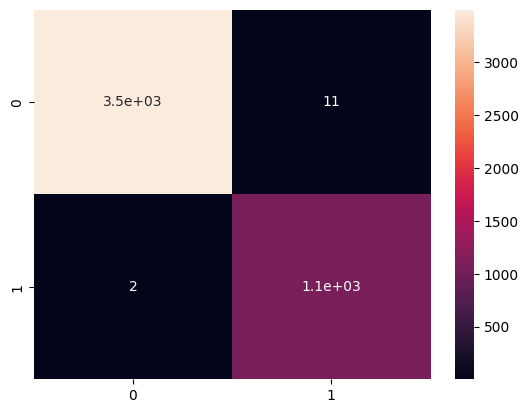

In [40]:
y_predict_train = NB_classifier.predict(X_train)
y_predict_train
cm = confusion_matrix(y_train, y_predict_train)
sns.heatmap(cm, annot=True)

<Axes: >

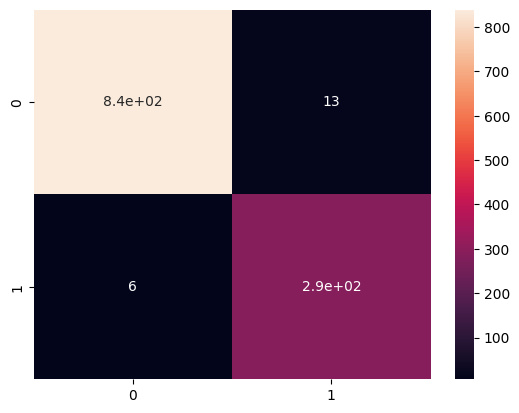

In [41]:
# Predicting the Test set results
y_predict_test = NB_classifier.predict(X_test)
cm = confusion_matrix(y_test, y_predict_test)
sns.heatmap(cm, annot=True)

In [42]:
print(classification_report(y_test, y_predict_test))

              precision    recall  f1-score   support

           0       0.99      0.98      0.99       852
           1       0.96      0.98      0.97       294

    accuracy                           0.98      1146
   macro avg       0.97      0.98      0.98      1146
weighted avg       0.98      0.98      0.98      1146



Using  TfidfTransformer

In [43]:
spamham_countvectorizer

<5728x34597 sparse matrix of type '<class 'numpy.int64'>'
	with 554178 stored elements in Compressed Sparse Row format>

In [44]:
from sklearn.feature_extraction.text import TfidfTransformer
emails_tfidf = TfidfTransformer().fit_transform(spamham_countvectorizer)
print(emails_tfidf.shape)

(5728, 34597)


In [45]:
print(emails_tfidf[:,:])
# Sparse matrix with all the values of IF-IDF

  (0, 33946)	0.0687915130274585
  (0, 33829)	0.06745704459111104
  (0, 33827)	0.05957917959294827
  (0, 33452)	0.128421684270056
  (0, 32537)	0.05224642658367154
  (0, 32308)	0.09368551907054103
  (0, 31151)	0.06909584679311226
  (0, 30679)	0.08919407297035603
  (0, 30501)	0.05613518622068526
  (0, 30286)	0.11133796618162313
  (0, 30271)	0.11941940075805363
  (0, 30034)	0.017194408880202943
  (0, 30015)	0.11941940075805363
  (0, 29966)	0.07540501607407281
  (0, 29696)	0.1183096990370906
  (0, 29689)	0.0848509242900969
  (0, 29315)	0.10436623332615566
  (0, 28097)	0.04577356923293433
  (0, 27777)	0.09317976470154866
  (0, 26860)	0.06148125742418366
  (0, 26319)	0.09197686812435955
  (0, 26177)	0.1099616791380058
  (0, 26061)	0.06580809520151511
  (0, 25348)	0.07316450649216368
  (0, 25347)	0.057518699324035014
  :	:
  (5727, 7850)	0.0404024473945397
  (5727, 7579)	0.04294530797798855
  (5727, 7512)	0.16197336201038873
  (5727, 5562)	0.5498472781547327
  (5727, 5474)	0.023814051654647343

In [46]:
X = emails_tfidf
y = label

In [47]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)



In [48]:
from sklearn.naive_bayes import MultinomialNB
NB_classifier = MultinomialNB()
NB_classifier.fit(X_train, y_train)



MultinomialNB()

<Axes: >

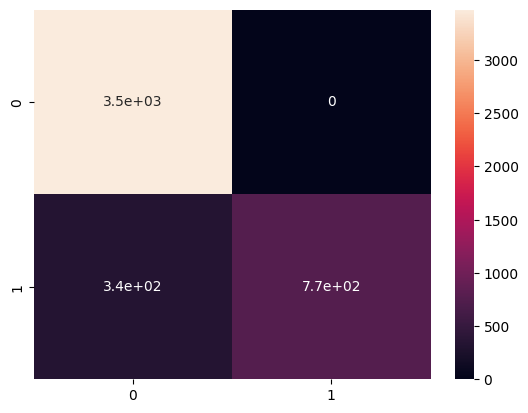

In [49]:
from sklearn.metrics import classification_report, confusion_matrix
y_predict_train = NB_classifier.predict(X_train)
y_predict_train
cm = confusion_matrix(y_train, y_predict_train)
sns.heatmap(cm, annot=True)

In [50]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_predict_test)

0.6239092495636999

In [51]:
print(classification_report(y_test, y_predict_test))

              precision    recall  f1-score   support

           0       0.77      0.73      0.75       886
           1       0.22      0.25      0.23       260

    accuracy                           0.62      1146
   macro avg       0.49      0.49      0.49      1146
weighted avg       0.64      0.62      0.63      1146



In [52]:
import pickle
# Save the model to a file
with open('Naive_bayes_model.pkl', 'wb') as file:
    pickle.dump(NB_classifier, file)


In [53]:
with open('count_vectorizer.pkl', 'wb') as file:
    pickle.dump(vectorizer, file)